In [1]:
import pandas as pd
import datetime
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

In [2]:
def duration_grouping(df, duration_min, duration_max): 
    return df[(df['duration']>duration_min) & (df['duration']<=duration_max)]

In [3]:
def duration_groups_av_noise(df): 
    
    #array of TOL frequency bands as float
    freq = df.drop(['filename', 'broadband_spl', 'background_spl', 'loud', 'duration', 'timestamp'], axis=1).columns.to_numpy()
    freq = freq.astype(np.float)

    #create dataframes 
    df_short = duration_grouping(df, 0, 0.5)
    df_med_short = duration_grouping(df, 0.5, 5)
    df_med = duration_grouping(df, 5, 120)
    df_long = duration_grouping(df, 120, 1200)
    
    #average noise across each duration specified
    short_av = df_short.drop(['filename', 'broadband_spl', 'background_spl', 'loud', 'duration', 'timestamp'], axis=1).mean(axis=0) 
    med_short_av = df_med_short.drop(['filename', 'broadband_spl', 'background_spl', 'loud', 'duration', 'timestamp'], axis=1).mean(axis=0) 
    med_av = df_med.drop(['filename', 'broadband_spl', 'background_spl', 'loud', 'duration', 'timestamp'], axis=1).mean(axis=0) 
    long_av = df_long.drop(['filename', 'broadband_spl', 'background_spl', 'loud', 'duration', 'timestamp'], axis=1).mean(axis=0) 
    
    
    #frequency against average noise for each duration specified
    freq_dist_short = pd.DataFrame({'Freq':freq, 'Average Noise':short_av})
    freq_dist_med_short = pd.DataFrame({'Freq':freq, 'Average Noise':med_short_av})
    freq_dist_med = pd.DataFrame({'Freq':freq, 'Average Noise':med_av})
    freq_dist_long = pd.DataFrame({'Freq':freq, 'Average Noise':long_av})
        
    return freq_dist_short, freq_dist_med_short, freq_dist_med, freq_dist_long

In [4]:
#import monthly files, only events that are flagged as loud
aug_loud = pd.read_feather(r'C:\transients' + '\\2018_08' + '.feather')
sep_loud = pd.read_feather(r'C:\transients' + '\\2018_09' + '.feather')
oct_loud = pd.read_feather(r'C:\transients' + '\\2018_10' + '.feather')
nov_loud = pd.read_feather(r'C:\transients' + '\\2018_11' + '.feather')
dec_loud = pd.read_feather(r'C:\transients' + '\\2018_12' + '.feather')
jan_loud = pd.read_feather(r'C:\transients' + '\\2019_01' + '.feather')
feb_loud = pd.read_feather(r'C:\transients' + '\\2019_02' + '.feather')
mar_loud = pd.read_feather(r'C:\transients' + '\\2019_03' + '.feather')
apr_loud = pd.read_feather(r'C:\transients' + '\\2019_04' + '.feather')
may_loud = pd.read_feather(r'C:\transients' + '\\2019_05' + '.feather')

In [5]:
#import monthly files, keeping only the average noise for each TOL band across the whole month 
aug  = pd.read_feather(r'C:\monthly_data' + '\\2018_08' + '.feather').drop(['filename', 'broadband_spl', 'background_spl',  'unnormalised_broadband_spl', 'short_transient', 'loud', 'timestamp'], axis=1).mean(axis=0) 
sep  = pd.read_feather(r'C:\monthly_data' + '\\2018_09' + '.feather').drop(['filename', 'broadband_spl', 'background_spl',  'unnormalised_broadband_spl', 'short_transient', 'loud', 'timestamp'], axis=1).mean(axis=0) 
oct  = pd.read_feather(r'C:\monthly_data' + '\\2018_10' + '.feather').drop(['filename', 'broadband_spl', 'background_spl',  'unnormalised_broadband_spl', 'short_transient', 'loud', 'timestamp'], axis=1).mean(axis=0) 
nov  = pd.read_feather(r'C:\monthly_data' + '\\2018_11' + '.feather').drop(['filename', 'broadband_spl', 'background_spl',  'unnormalised_broadband_spl', 'short_transient', 'loud', 'timestamp'], axis=1).mean(axis=0) 
dec  = pd.read_feather(r'C:\monthly_data' + '\\2018_12' + '.feather').drop(['filename', 'broadband_spl', 'background_spl',  'unnormalised_broadband_spl', 'short_transient', 'loud', 'timestamp'], axis=1).mean(axis=0) 
jan  = pd.read_feather(r'C:\monthly_data' + '\\2019_01' + '.feather').drop(['filename', 'broadband_spl', 'background_spl',  'unnormalised_broadband_spl', 'short_transient', 'loud', 'timestamp'], axis=1).mean(axis=0) 
feb  = pd.read_feather(r'C:\monthly_data' + '\\2019_02' + '.feather').drop(['filename', 'broadband_spl', 'background_spl',  'unnormalised_broadband_spl', 'short_transient', 'loud', 'timestamp'], axis=1).mean(axis=0) 
mar  = pd.read_feather(r'C:\monthly_data' + '\\2019_03' + '.feather').drop(['filename', 'broadband_spl', 'background_spl',  'unnormalised_broadband_spl', 'short_transient', 'loud', 'timestamp'], axis=1).mean(axis=0) 
apr  = pd.read_feather(r'C:\monthly_data' + '\\2019_04' + '.feather').drop(['filename', 'broadband_spl', 'background_spl',  'unnormalised_broadband_spl', 'short_transient', 'loud', 'timestamp'], axis=1).mean(axis=0) 
may  = pd.read_feather(r'C:\monthly_data' + '\\2019_05' + '.feather').drop(['filename', 'broadband_spl', 'background_spl',  'unnormalised_broadband_spl', 'short_transient', 'loud', 'timestamp'], axis=1).mean(axis=0) 

In [6]:
#frequencies as floats
freq = aug_loud.drop(['filename', 'broadband_spl', 'background_spl', 'loud', 'duration', 'timestamp'], axis=1).columns.to_numpy()
freq = freq.astype(np.float)

Text(0.04, 0.5, 'Average Noise levels across month (dB rel.)')

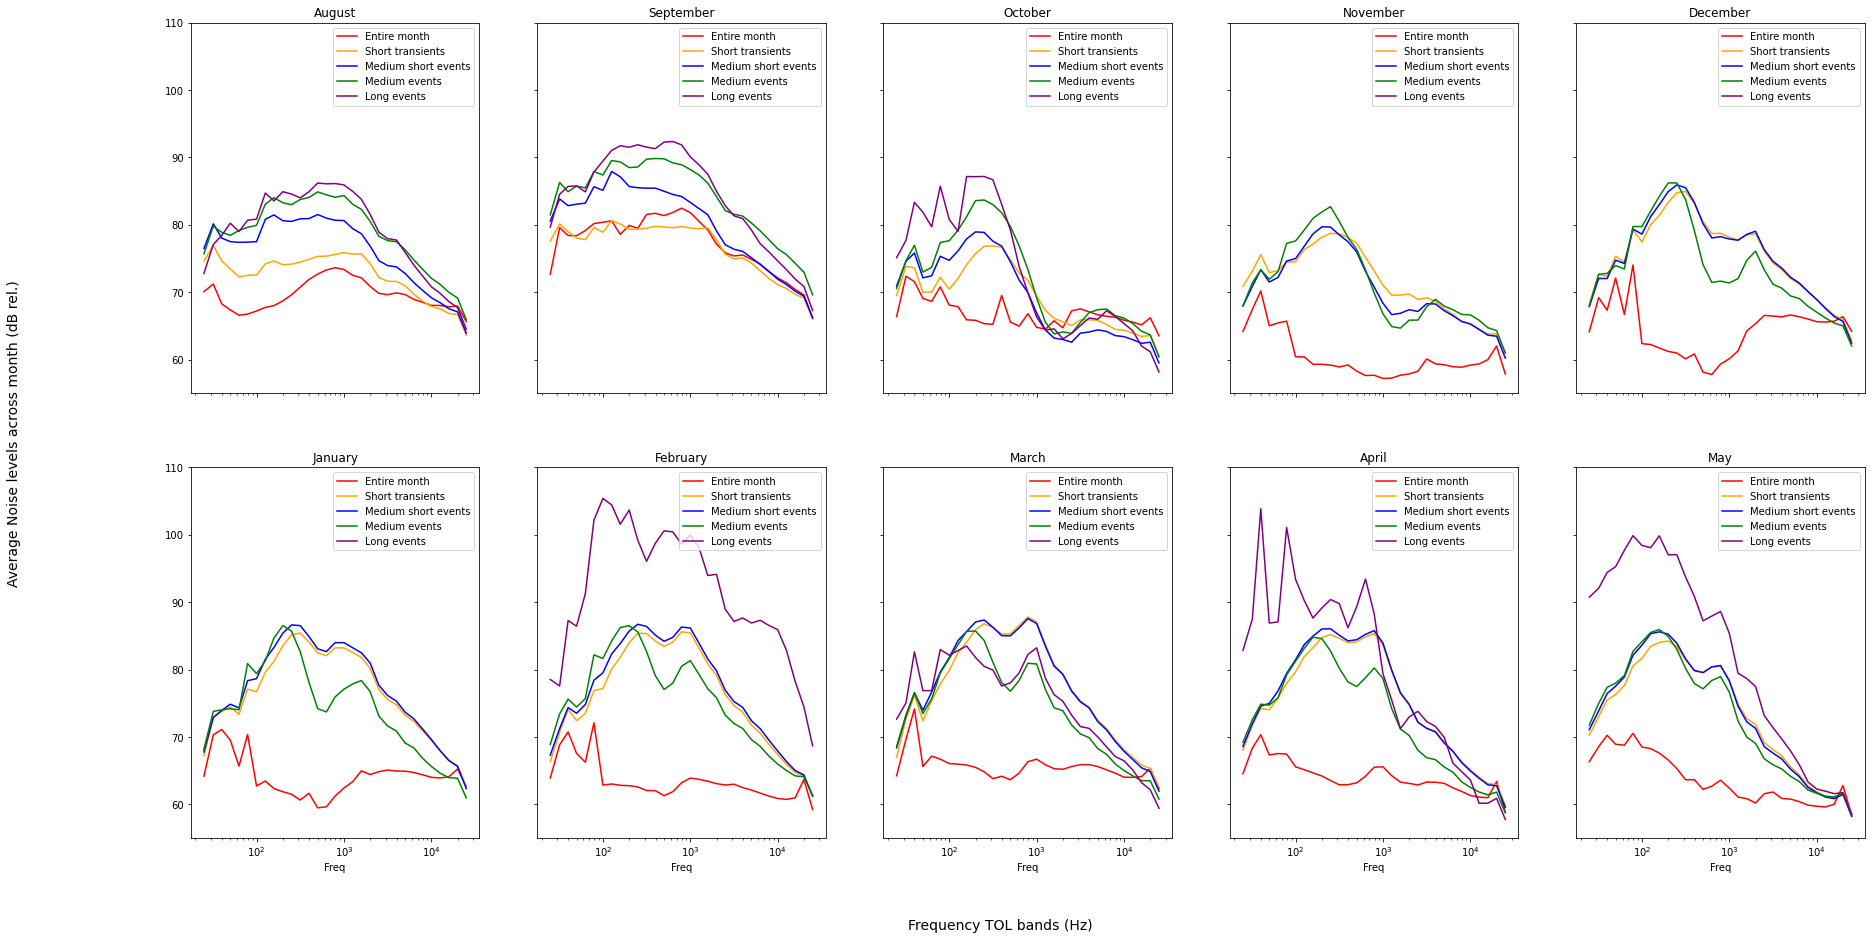

In [7]:
#define number of rows and columns for subplots
nrow=2
ncol=5

# make a list of all dataframes 
df_month_list =  [aug, sep, oct, nov, dec, jan, feb, mar, apr, may]
df_loud_list =  [aug_loud, sep_loud, oct_loud, nov_loud, dec_loud, jan_loud, feb_loud, mar_loud, apr_loud, may_loud]
titles = ['August', 'September', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May']


fig, axes = plt.subplots(nrow, ncol, sharex=True, sharey=True, figsize=(30,15))

# plot counter
count=0
for r in range(nrow):
    for c in range(ncol):

        #get dataframes
        freq_dist_month = pd.DataFrame({'Freq':freq, 'Average Noise': df_month_list[count]})

        df_loud = df_loud_list[count]

        freq_dist_short, freq_dist_med_short, freq_dist_med, freq_dist_long = duration_groups_av_noise(df_loud)

        #plotting 
        freq_dist_month.plot(x='Freq', y='Average Noise', color='r', stacked=False, ax=axes[r,c], label='Entire month')
        freq_dist_short.plot(x='Freq', y='Average Noise', color='orange', stacked=False, ax=axes[r,c], label='Short transients')
        freq_dist_med_short.plot(x='Freq', y='Average Noise', color='b', stacked=False, ax=axes[r,c], label='Medium short events')
        freq_dist_med.plot(x='Freq', y='Average Noise', color='g', stacked=False, ax=axes[r,c], label='Medium events')
        freq_dist_long.plot(x='Freq', y='Average Noise', color='purple', stacked=False, ax=axes[r,c], label='Long events')

        #set titles 
        axes[r, c].set_title(titles[count])

        count+=1

#formatting axis labels and axis limits 
plt.legend()
plt.xscale('log')
plt.ylim(55, 110)
fig.text(0.5, 0.04, 'Frequency TOL bands (Hz)', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Average Noise levels across month (dB rel.)', va='center', rotation='vertical', fontsize=14)

Durations key: <br>
Short transients: < 0.5 seconds  <br>
Medium short events: 0.5 sec - 5 sec   <br>
Medium events: 5 sec - 3 minutes   <br>
Long events: 3 minutes - 20 minutes   <br>

Text(0.04, 0.5, 'Average Noise levels across month (dB rel.)')

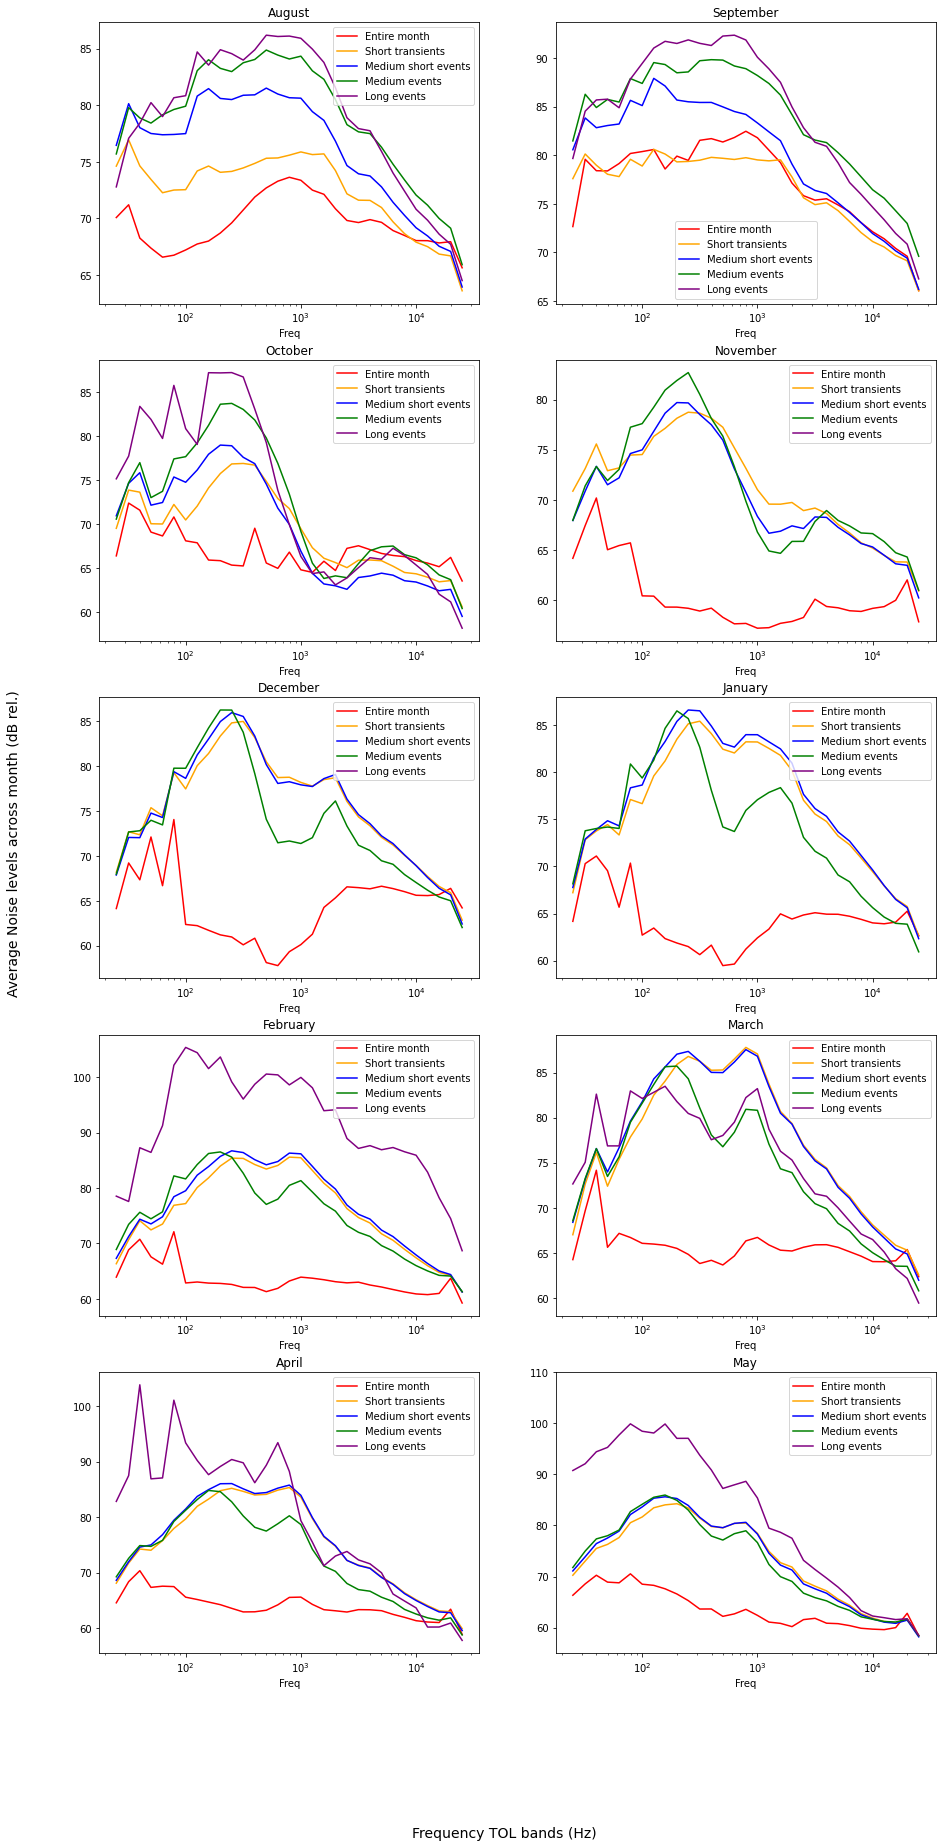

In [8]:
#define number of rows and columns for subplots
nrow=5
ncol=2

# make a list of all dataframes 
df_month_list =  [aug, sep, oct, nov, dec, jan, feb, mar, apr, may]
df_loud_list =  [aug_loud, sep_loud, oct_loud, nov_loud, dec_loud, jan_loud, feb_loud, mar_loud, apr_loud, may_loud]
titles = ['August', 'September', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May']


fig, axes = plt.subplots(nrow, ncol, sharex=False, sharey=False, figsize=(15,30))

# plot counter
count=0
for r in range(nrow):
    for c in range(ncol):

        #get dataframes
        freq_dist_month = pd.DataFrame({'Freq':freq, 'Average Noise': df_month_list[count]})

        df_loud = df_loud_list[count]

        freq_dist_short, freq_dist_med_short, freq_dist_med, freq_dist_long = duration_groups_av_noise(df_loud)

        #plotting 
        freq_dist_month.plot(x='Freq', y='Average Noise', color='r', stacked=False, ax=axes[r,c], label='Entire month')
        freq_dist_short.plot(x='Freq', y='Average Noise', color='orange', stacked=False, ax=axes[r,c], label='Short transients')
        freq_dist_med_short.plot(x='Freq', y='Average Noise', color='b', stacked=False, ax=axes[r,c], label='Medium short events')
        freq_dist_med.plot(x='Freq', y='Average Noise', color='g', stacked=False, ax=axes[r,c], label='Medium events')
        freq_dist_long.plot(x='Freq', y='Average Noise', color='purple', stacked=False, ax=axes[r,c], label='Long events')

        #set titles 
        axes[r, c].set_title(titles[count])
        axes[r, c].set_xscale('log')

        count+=1

#formatting axis labels and axis limits 
plt.legend()
#plt.xscale('log')
plt.ylim(55, 110)
fig.text(0.5, 0.04, 'Frequency TOL bands (Hz)', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Average Noise levels across month (dB rel.)', va='center', rotation='vertical', fontsize=14)

PLOT ANALYSIS

In [9]:
#investigating long events in May - noise above the background 
may_long = duration_grouping(may_loud, 180, 1200)
background_diff = may_long['background_spl'] - may_long['broadband_spl']
background_diff

34105   -13.557429
35894   -16.370481
35941   -10.380953
38141   -11.465419
dtype: float64

frequency distribution for long, loud events in May


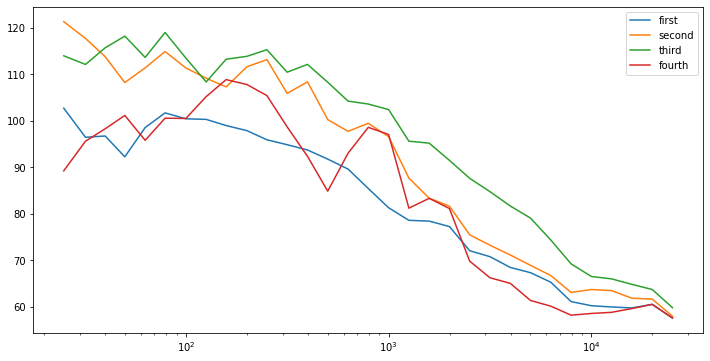

In [10]:
plt.figure(figsize=(12, 6))
plt.xscale('log')
#plt.plot(freq, may_long.drop(['filename', 'broadband_spl', 'background_spl', 'loud', 'duration', 'timestamp'], axis=1).mean(axis=0), label='mean')
plt.plot(freq, may_long.drop(['filename', 'broadband_spl', 'background_spl', 'loud', 'duration', 'timestamp'], axis=1).iloc[0], label='first')
plt.plot(freq, may_long.drop(['filename', 'broadband_spl', 'background_spl', 'loud', 'duration', 'timestamp'], axis=1).iloc[1],  label='second')
plt.plot(freq, may_long.drop(['filename', 'broadband_spl', 'background_spl', 'loud', 'duration', 'timestamp'], axis=1).iloc[2],  label='third')
plt.plot(freq, may_long.drop(['filename', 'broadband_spl', 'background_spl', 'loud', 'duration', 'timestamp'], axis=1).iloc[3],  label='fourth')
plt.legend()
print('frequency distribution for long, loud events in May')

Long, very loud events occcur in May on 15th to 17th - 4 events, durations of 3 minutes, 5 minutes, 7 minutes and 2 minutes. <br>
Chosen background (where which loud events are detected) is 10 minutes, therefore we cannot expect to see any loud events lasting much longer than 10 minutes.  <br>
First two weeks of May the temperature increases from -22 to -2, perhaps the onset of ice melting?

In [11]:
#print('5 loudest TOL band for mean noise across 4 events')
#may_long.drop(['filename', 'broadband_spl', 'background_spl', 'loud', 'duration', 'timestamp'], axis=1).mean(axis=0).sort_values(ascending=False).head()

In [12]:
#print('fourth event')
#may_long.drop(['filename', 'broadband_spl', 'background_spl', 'loud', 'duration', 'timestamp'], axis=1).iloc[3]

In [13]:
#mar_short = duration_grouping(mar_loud, 0, 0.5)
#mar_short.drop(['filename', 'broadband_spl', 'background_spl', 'loud', 'duration', 'timestamp'], axis=1).mean(axis=0).sort_values(ascending=False)

In [20]:
feb_long = duration_grouping(oct_loud, 120, 1200)
feb_long

,25,32,40,50,63,79,100,126,158,200,...,12589,15849,19953,25119,filename,timestamp,broadband_spl,background_spl,loud,duration
740,67.037056,73.742737,73.149284,86.310356,87.026993,93.542496,78.899269,76.100533,100.384819,87.173599,...,63.266102,62.002846,61.243511,58.146336,ICLISTENHF1266_20181011T151920.944Z_TOL_1sHann...,2018-10-11 15:23:23.944,-45.113358,-57.135878,True,176.5
5457,65.267075,75.838066,75.800026,71.492241,72.176826,79.694153,80.838478,81.354561,79.884605,91.081474,...,65.011940,62.881672,61.497383,58.933834,ICLISTENHF1266_20181026T010813.989Z_TOL_1sHann...,2018-10-26 01:11:19.489,-48.661745,-61.657537,True,150.0
8734,93.039146,83.496521,101.056618,87.760712,79.875053,83.912956,82.694374,79.597580,81.197708,83.147751,...,64.510109,61.180061,60.709900,57.402946,ICLISTENHF1266_20181030T152202.989Z_TOL_1sHann...,2018-10-30 15:23:48.989,-44.219304,-58.743928,True,155.0
